In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import glob
import cv2

In [ ]:
#loading_data
from google.colab import files
uploaded=files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [ ]:
#spliting_data

data = pd.read_csv("Social_Network_Ads.csv")
display(data.tail())

print(len(data))
#shuffling_data
p = np.random.permutation(len(data))
#print(p)
data = data.loc[p]

train_data = data[: (int((len(data))*0.75))]

test_data = data[(int((len(data))*0.75)) :]  




,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


400


In [ ]:
X_train = np.array(train_data.drop(["Purchased","User ID"] , axis = 1).copy()).T
Y_train = np.array([train_data['Purchased'].copy()])

X_test = np.array(test_data.drop(["Purchased","User ID"] , axis = 1).copy()).T
Y_test = np.array([test_data['Purchased'].copy()])

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3, 300)
(1, 300)
(3, 100)
(1, 100)


In [ ]:
#changing Male and female into binary
temp1 = np.int64(X_train[0,:] == 'Male')
X_train[0,:] = np.copy(temp1)

temp2 = np.int64(X_test[0,:] == 'Male')
X_test[0,:] = np.copy(temp2)

#print(X_train)
#print(X_test)

In [ ]:
X_train = np.copy(X_train).astype(float)
X_test  = np.copy(X_test).astype(float)
#data_preprocessing
mean = np.array([np.mean(X_train , axis = 1)]).T  #normalizing the training set
max = np.array([np.max(X_train , axis = 1)]).T
min = np.array([np.min(X_train , axis=1)]).T
X_train = ((X_train - mean) / (max - min))

print(X_train.shape)
print(Y_train.shape)

mean = np.array([np.mean(X_test , axis = 1)]).T  #normalizing the test set
max = np.array([np.max(X_test , axis = 1)]).T
min = np.array([np.min(X_test , axis=1)]).T
X_test = ((X_test - mean) / (max - min))

print(X_test.shape)
print(Y_test.shape)

(3, 300)
(1, 300)
(3, 100)
(1, 100)


In [ ]:
#intisialize_parameters
parameters={}
parameters["W"] = np.zeros((X_train.shape[0],1))
parameters["b"] = np.zeros((1,1))

m = X_train.shape[1]
#sigmoid
def sigmoid(z):
  s = 1/(1+np.exp(-z))
  return s


In [ ]:
def logistic_regression_train(X,Y,parameters,num_iterations,learning_rate):
  m = X_train.shape[1]
  costs = []
  grads={}
  Y_predict = np.zeros((1,m))

  for i in range(num_iterations):

    #forward_prop
    Z = np.dot(parameters["W"].T,X) + parameters["b"]
    A = sigmoid(Z)

    #back_prop
    dZ = A - Y
    grads["dW"] = (1/m)*(np.dot(X,dZ.T))
    grads["db"] = (1/m)*(np.sum(dZ))

    #update_parameters
    parameters["W"] = parameters["W"] - learning_rate*grads["dW"]
    parameters["b"] = parameters["b"] - learning_rate*grads["db"]

    #compute_cost
    cost = (-1/m)*(np.dot(Y,np.log(A).T) + np.dot(1-Y,np.log(1-A).T))
    print(cost)
    costs.append(float(cost))

    #predict
    for i in range(m):
      if A[0,i] > 0.45:
        Y_predict[0,i] = 1
      else:
        Y_predict[0,i] = 0   

    

  plt.plot(list(range(num_iterations)),costs)
  return Y_predict,parameters 

Streaming output truncated to the last 5000 lines.
[[0.36387802]]
[[0.36387752]]
[[0.36387702]]
[[0.36387651]]
[[0.36387601]]
[[0.36387551]]
[[0.363875]]
[[0.3638745]]
[[0.363874]]
[[0.3638735]]
[[0.36387299]]
[[0.36387249]]
[[0.36387199]]
[[0.36387148]]
[[0.36387098]]
[[0.36387048]]
[[0.36386997]]
[[0.36386947]]
[[0.36386897]]
[[0.36386847]]
[[0.36386796]]
[[0.36386746]]
[[0.36386696]]
[[0.36386646]]
[[0.36386595]]
[[0.36386545]]
[[0.36386495]]
[[0.36386445]]
[[0.36386394]]
[[0.36386344]]
[[0.36386294]]
[[0.36386244]]
[[0.36386194]]
[[0.36386143]]
[[0.36386093]]
[[0.36386043]]
[[0.36385993]]
[[0.36385942]]
[[0.36385892]]
[[0.36385842]]
[[0.36385792]]
[[0.36385742]]
[[0.36385692]]
[[0.36385641]]
[[0.36385591]]
[[0.36385541]]
[[0.36385491]]
[[0.36385441]]
[[0.3638539]]
[[0.3638534]]
[[0.3638529]]
[[0.3638524]]
[[0.3638519]]
[[0.3638514]]
[[0.3638509]]
[[0.36385039]]
[[0.36384989]]
[[0.36384939]]
[[0.36384889]]
[[0.36384839]]
[[0.36384789]]
[[0.36384739]]
[[0.36384689]]
[[0.36384638]]
[[

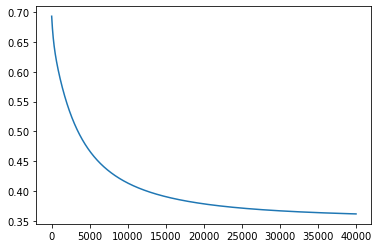

In [ ]:
Y_predict,parameters = logistic_regression_train(X_train,Y_train,parameters,num_iterations=40000,learning_rate=0.01)

In [ ]:
#print(Y_predict.shape)

In [ ]:
#Acuracy
misclassified = np.sum(np.abs(Y_predict[0,:] - Y_train[0,:]))
Acuracy = (100 - (misclassified/m)*100)
print(Acuracy)

83.66666666666667


In [ ]:
#creating_test_model

def logistic_regression_test(X,Y,parameters):
  m = X_test.shape[1]
  costs = []
  grads={}
  Y_predict = np.zeros((1,m))

  #forward_prop
  Z = np.dot(parameters["W"].T,X) + parameters["b"]
  A = sigmoid(Z)

  for i in range(m):
    if A[0,i] > 0.5:
      Y_predict[0,i] = 1
    else:
      Y_predict[0,i] = 0 

  return Y_predict          

In [ ]:
Y_predict_test = logistic_regression_test(X_test,Y_test,parameters)

In [ ]:
#print(Y_predict.shape)

In [ ]:
#Test_Acuracy
misclassified = np.sum(np.abs(Y_predict_test[0,:] - Y_test[0,:]))
# print(Y_test.astype(float))
# print(Y_predict_test)
# print(misclassified)
Acuracy = (100 - (misclassified/X_test.shape[1])*100)
print(Acuracy)

85.0
